In [1]:
# !pip install yellowbrick

In [2]:
from yellowbrick.cluster import KElbowVisualizer

In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets 
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

C:\Users\igumn\AppData\Local\Temp\ipykernel_5748\229938720.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# КЛАСТЕРИЗАЦИЯ

In [4]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [5]:
X.shape

(1797, 64)

In [6]:
y.shape

(1797,)

In [7]:
cmap = plt.cm.get_cmap('nipy_spectral', 10)

C:\Users\igumn\AppData\Local\Temp\ipykernel_5748\3764625745.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', 10)


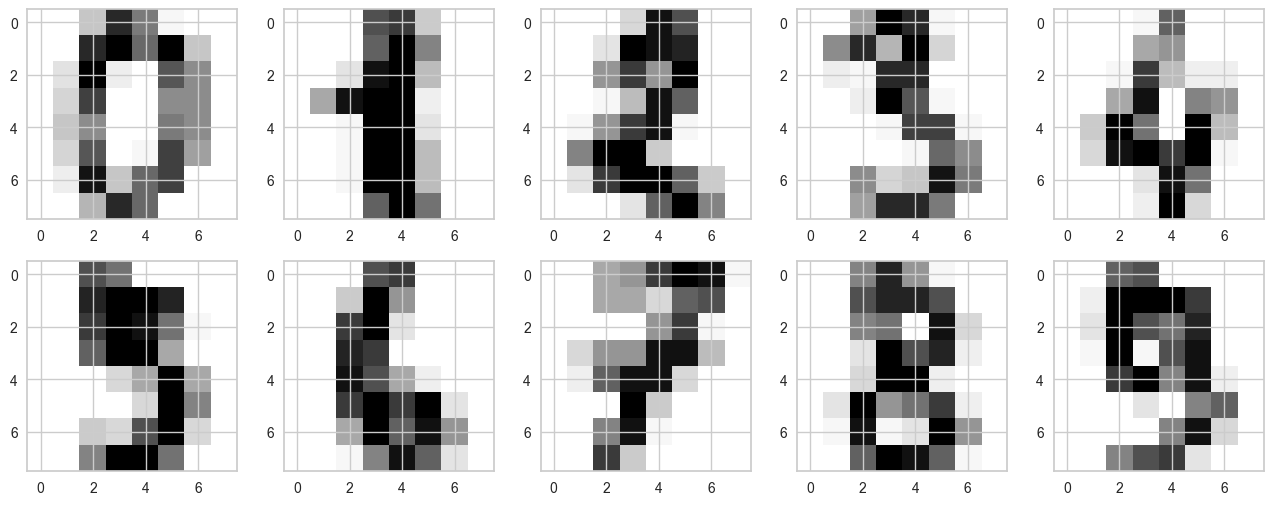

In [8]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

Получается, размерность признакового пространства здесь – 64. Но давайте снизим размерность всего до 2 и увидим, что даже на глаз рукописные цифры неплохо разделяются на кластеры.

In [9]:
from sklearn.decomposition import PCA

Projecting 64-dimensional data to 2D


Text(0.5, 1.0, 'MNIST. PCA projection')

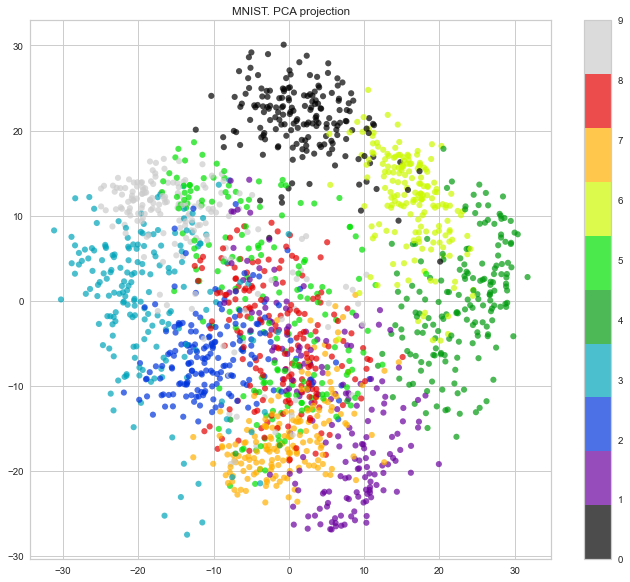

In [10]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

print('Projecting %d-dimensional data to 2D' % X.shape[1])

plt.figure(figsize=(12,10), dpi=70)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40, cmap=cmap)
#cmap=plt.cm.get_cmap('nipy_spectral', 10)
plt.colorbar()
plt.title('MNIST. PCA projection')

C t-SNE картинка получается еще лучше, поскольку у PCA ограничение – он находит только линейные комбинации исходных признаков. Зато даже на этом относительно небольшом наборе данных можно заметить, насколько t-SNE дольше работает.

CPU times: total: 31.8 s
Wall time: 5.54 s


Text(0.5, 1.0, 'MNIST. t-SNE projection')

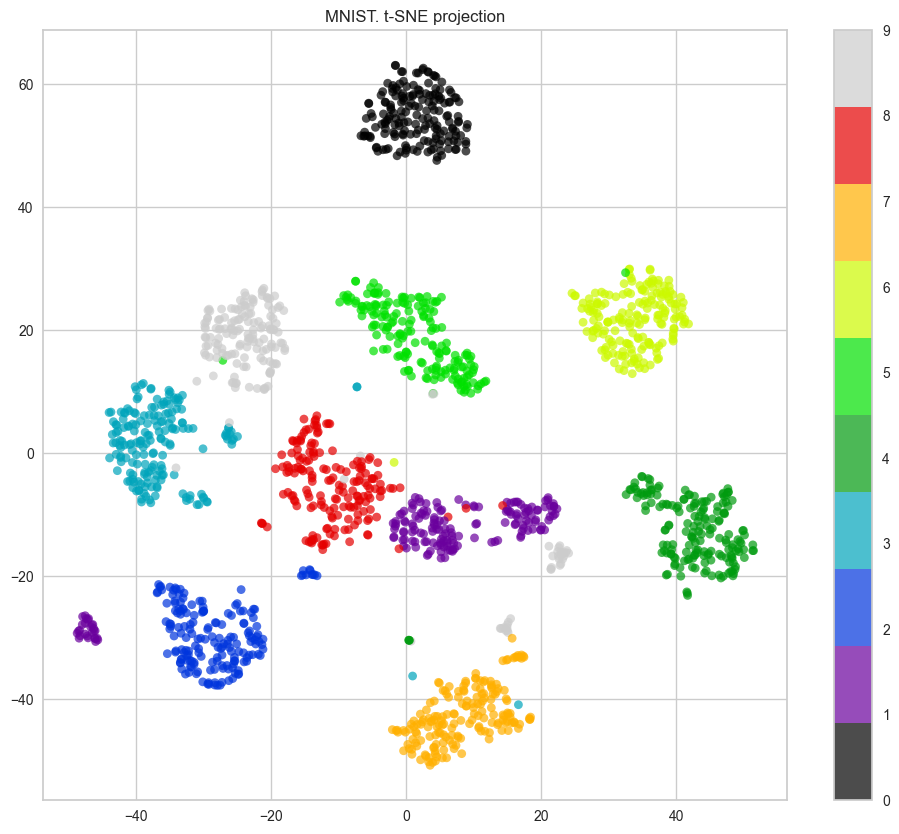

In [11]:
%%time

from sklearn.manifold import TSNE
tsne = TSNE(random_state=42, n_iter=1000)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=cmap)

plt.colorbar()
plt.title('MNIST. t-SNE projection')

## Иерархическая кластеризация

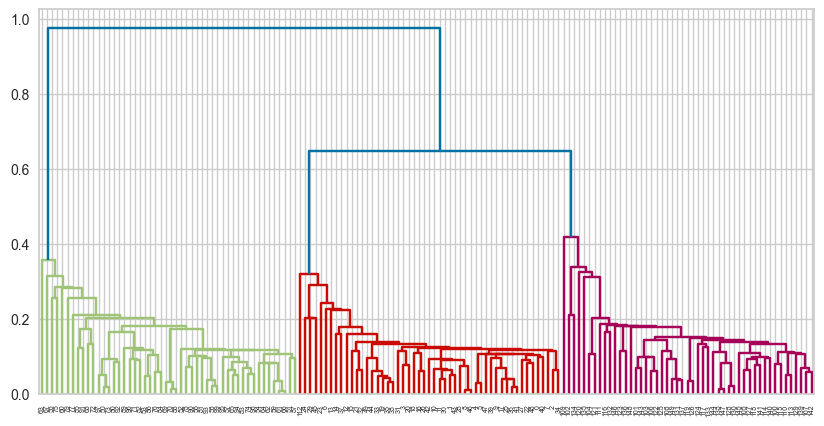

In [12]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

## K-Means кластеризация

(-15.0, 15.0)

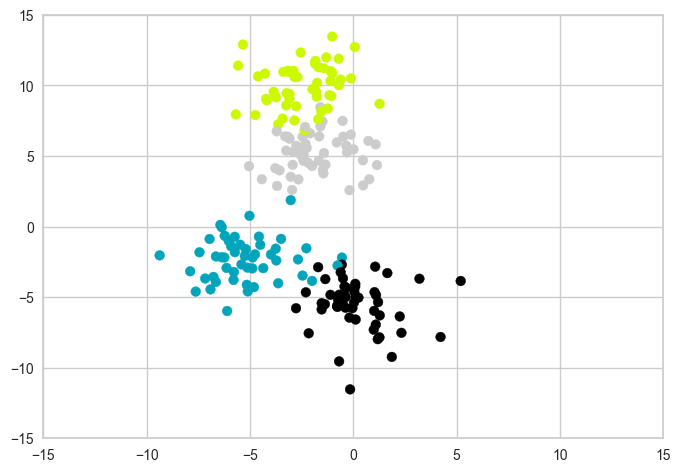

In [13]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)# create np array for data points
points = data[0]# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap=cmap)
plt.xlim(-15,15)
plt.ylim(-15,15)

У нас есть четыре цветных кластера, но есть некоторое совпадение с двумя кластерами сверху, а также с двумя кластерами снизу. Первым шагом в кластеризации k-средних является выбор случайных центроидов. Так как в этом случае наше k = 4, нам понадобится 4 случайных центроида. Вот как это выглядело в моей реализации с нуля.

[[ 0.05161133 -5.35489826]
 [-1.92101646  5.21673484]
 [-2.40167949 10.17352695]
 [-5.56465793 -2.34988939]]


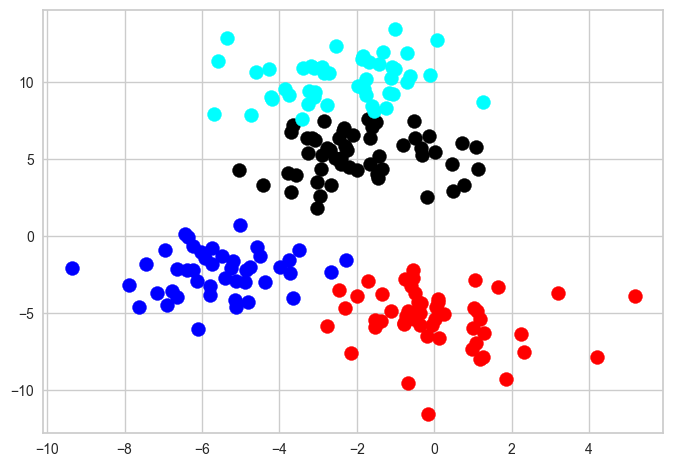

In [14]:
# import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=4)# fit kmeans object to data
kmeans.fit(points)# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)# save new clusters for chart
y_km = kmeans.fit_predict(points)

plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')

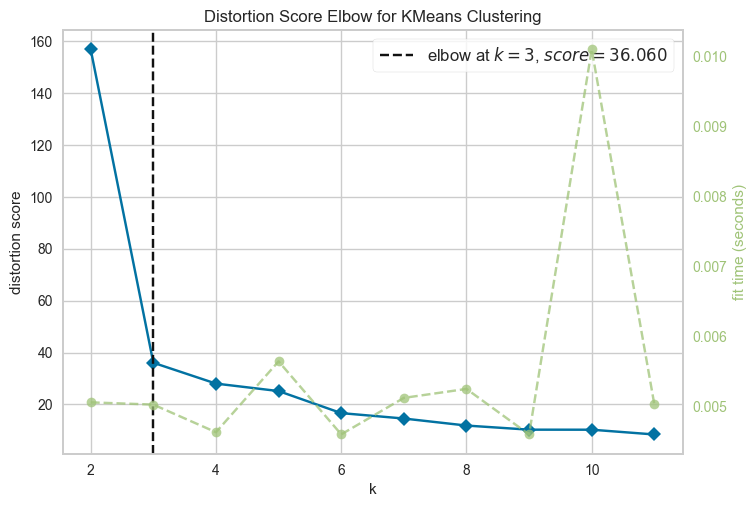

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

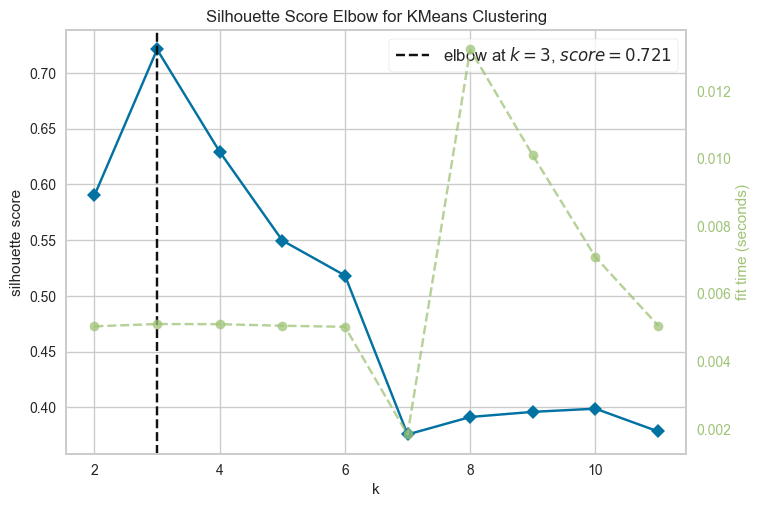

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [16]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

[[ 0.05161133 -5.35489826]
 [-5.50955539 -2.25816149]
 [-2.13583883  7.57989854]]


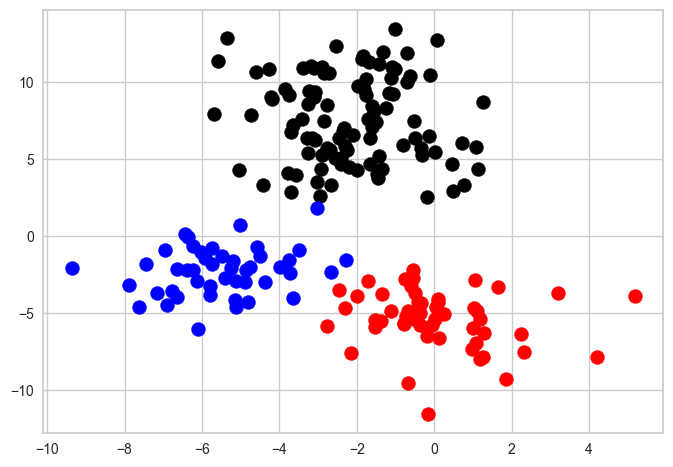

In [17]:
# import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# create kmeans object
kmeans = KMeans(n_clusters=3)# fit kmeans object to data
kmeans.fit(points)# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)# save new clusters for chart
y_km = kmeans.fit_predict(points)

plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')

# Метрики

Хорошая ознакомительная статья про метрики оценки качества кластеризации: https://habr.com/ru/company/ods/blog/325654/

#### Гомогенность, полнота, V-мера  
Она является симметричной и показывает, насколько две кластеризации схожи между собой.

#### Силуэт
Данный коэффициент не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации.  

Силуэт показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров.

### DBSCAN
https://www.youtube.com/watch?v=RDZUdRSDOok
Обязательно к просмотру для понимания работы алгоритма!

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [19]:
X, y = make_moons(n_samples=500, noise=0.1)
df=pd.DataFrame(X,y)
df=df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
0,-0.250632,0.951349
1,2.056736,0.367176
0,-0.621009,0.677288
1,0.470189,-0.198535
1,0.961995,-0.503660


Text(0, 0.5, '$x_2$')

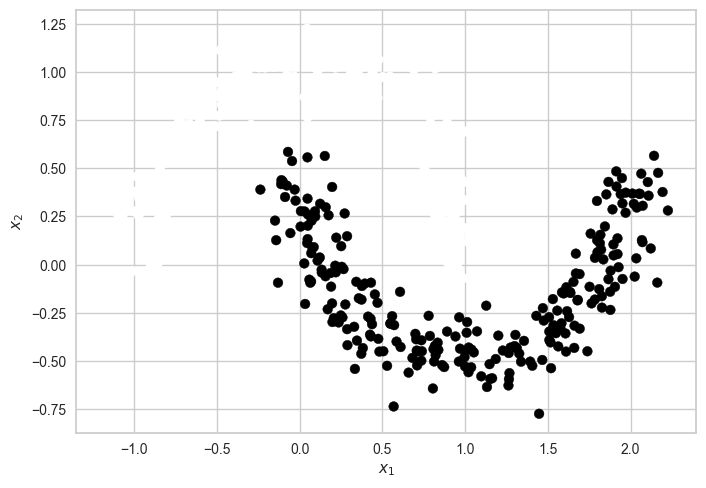

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Estimated no. of clusters: 1
Estimated no. of noise points: 0
v_measure = 0.0


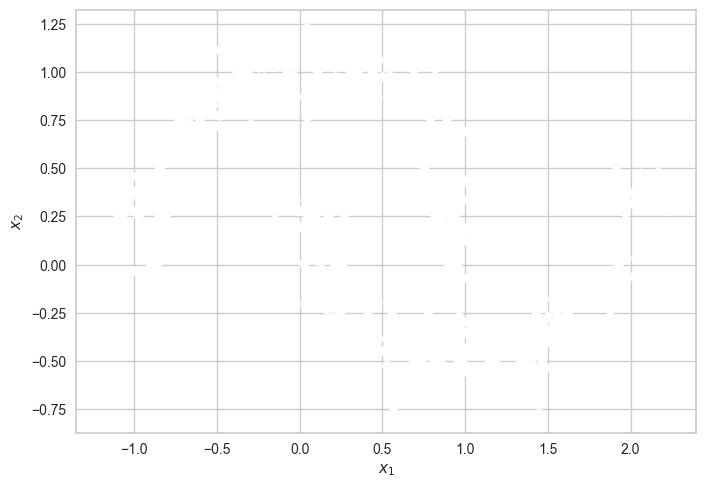

In [21]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster1.labels_, 
            label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 14
Estimated no. of noise points: 103
v_measure = 0.3510417748113019


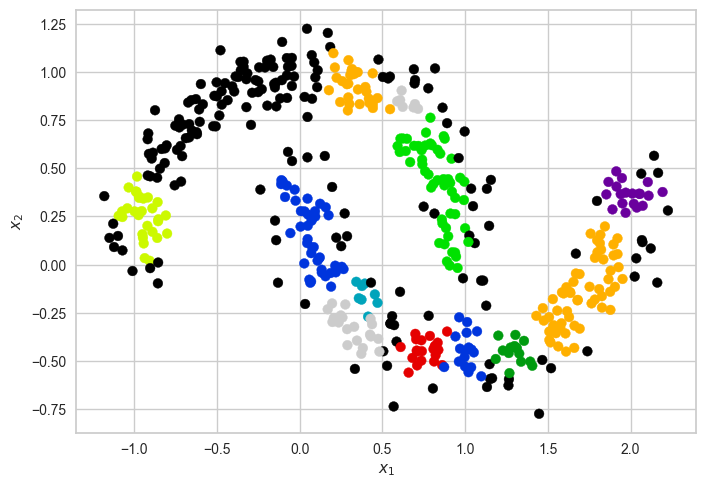

In [22]:
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=dbscan_cluster.labels_, 
            label=y,
           cmap=cmap)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Text(0, 0.5, 'Distance')

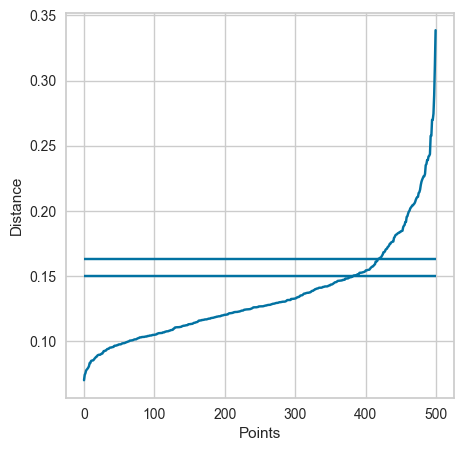

In [23]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)

distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.hlines(0.15, 0, 500)
plt.hlines(0.163, 0, 500)
plt.xlabel("Points")
plt.ylabel("Distance")

Estimated no. of clusters: 1
Estimated no. of noise points: 4
v_measure = 0.015079416441109083


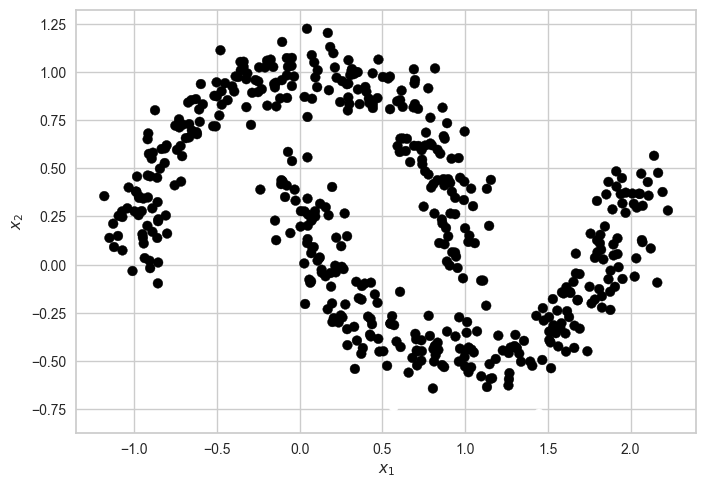

In [24]:
# from kneed import KneeLocator # определяет лучшее значение eps

dbscan_cluster = DBSCAN(eps=0.163, min_samples=5)
dbscan_cluster.fit(X)

# Visualizing DBSCAN
plt.scatter(X[:, 0], 
X[:, 1], 
c=dbscan_cluster.labels_, 
label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))